Zad. 8
Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa i testu Kołmogorowa z
wykorzystaniem PIT (probability integral transform), z hipotezą główną, że cecha ma rozkład
normalny w przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta lub z rozkładu 𝜒
2
(uwaga: żeby
wyniki były porównywalne trzeba pamiętać o standaryzacji danych). Uzyskane wyniki należy
przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu t-Studenta, 𝜒
2
.

In [10]:
# wybrałem że będziemy generować dane z rozkładu chi2 bo wcześniej już wiele razy powtarzał się rozkład tstudenta :)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Parametry
dfs = [i for i in range(1, 11, 1)]  # stopnie swobody
SampleSizes = [i for i in range(10, 101, 10)]  # rozmiary próbek
simulations_number = 100  # liczba symulacji

# Inicjalizacja wyników
results = []


Inicjalizacja potrzebnych zmiennych i parametrów

In [11]:
for df in dfs:
    for Sample in SampleSizes:
        # Inicjalizacja liczników
        ks_counter = 0
        pit_ks_counter = 0

        for _ in range(simulations_number):
            # Generowanie danych
            data = np.random.chisquare(df, size=Sample)

            # Standaryzacja danych
            data = (data - np.mean(data)) / np.std(data)

            # Test Kołmogorowa-Smirnowa
            ks_stat, p_val_ks = stats.kstest(data, 'norm')
            if p_val_ks < 0.05:
                ks_counter += 1

            # Transformacja PIT
            pit_data = stats.norm.cdf(data)

            # Test Kołmogorowa-Smirnowa na danych po transformacji PIT
            pit_ks_stat, p_val_pit_ks = stats.kstest(pit_data, 'uniform')
            if p_val_pit_ks < 0.05:
                pit_ks_counter += 1

        # Zapisanie wyników
        results.append([df, Sample, ks_counter/simulations_number, pit_ks_counter/simulations_number])


Algorytm  testujący moc testu K-S oraz PIT K-S.

In [12]:
# Wyświetlanie wyników
for result in results:
    print(f"Stopnie swobody: {result[0]}, rozmiar próbki: {result[1]}, moc testu Kołmogorowa: {result[2]}, moc testu Kołmogorowa z PIT: {result[3]}")


Stopnie swobody: 1, rozmiar próbki: 10, moc testu Kołmogorowa: 0.02, moc testu Kołmogorowa z PIT: 0.02
Stopnie swobody: 1, rozmiar próbki: 20, moc testu Kołmogorowa: 0.17, moc testu Kołmogorowa z PIT: 0.17
Stopnie swobody: 1, rozmiar próbki: 30, moc testu Kołmogorowa: 0.38, moc testu Kołmogorowa z PIT: 0.38
Stopnie swobody: 1, rozmiar próbki: 40, moc testu Kołmogorowa: 0.86, moc testu Kołmogorowa z PIT: 0.86
Stopnie swobody: 1, rozmiar próbki: 50, moc testu Kołmogorowa: 0.95, moc testu Kołmogorowa z PIT: 0.95
Stopnie swobody: 1, rozmiar próbki: 60, moc testu Kołmogorowa: 0.99, moc testu Kołmogorowa z PIT: 0.99
Stopnie swobody: 1, rozmiar próbki: 70, moc testu Kołmogorowa: 1.0, moc testu Kołmogorowa z PIT: 1.0
Stopnie swobody: 1, rozmiar próbki: 80, moc testu Kołmogorowa: 1.0, moc testu Kołmogorowa z PIT: 1.0
Stopnie swobody: 1, rozmiar próbki: 90, moc testu Kołmogorowa: 1.0, moc testu Kołmogorowa z PIT: 1.0
Stopnie swobody: 1, rozmiar próbki: 100, moc testu Kołmogorowa: 1.0, moc testu 

Tekstowa reprezentacja wyników:

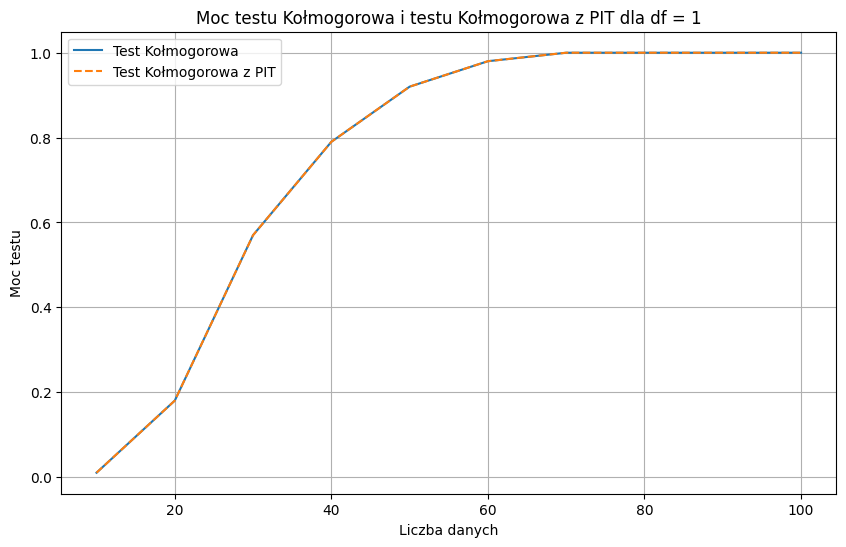

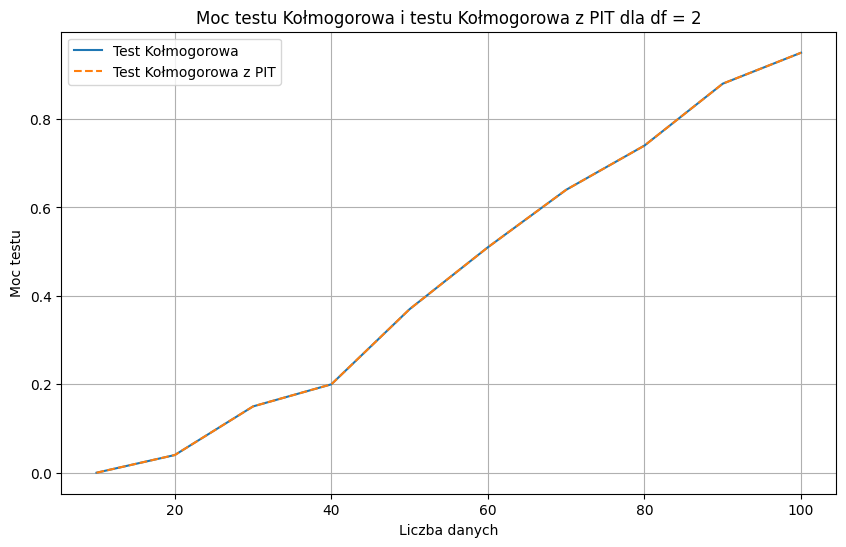

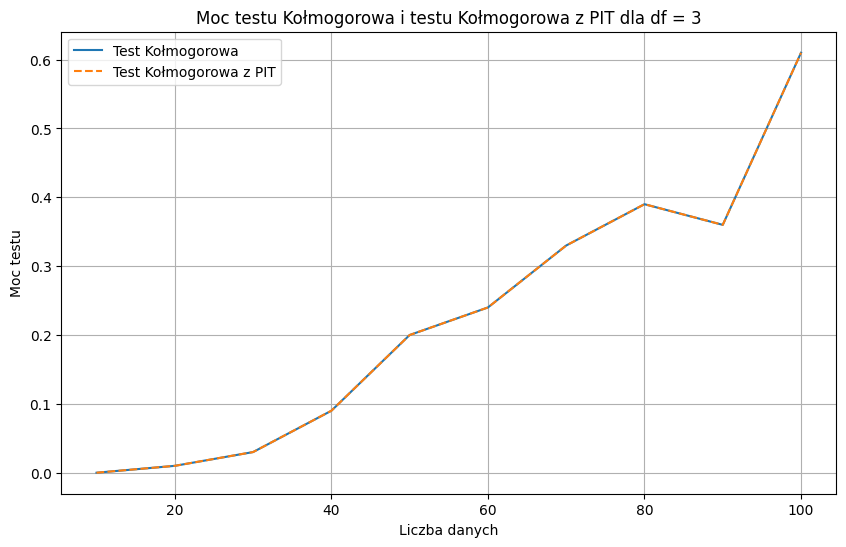

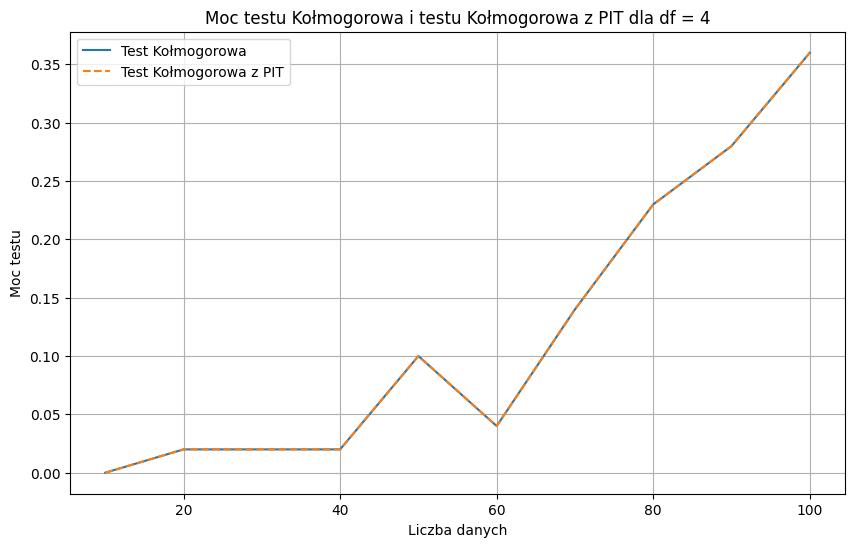

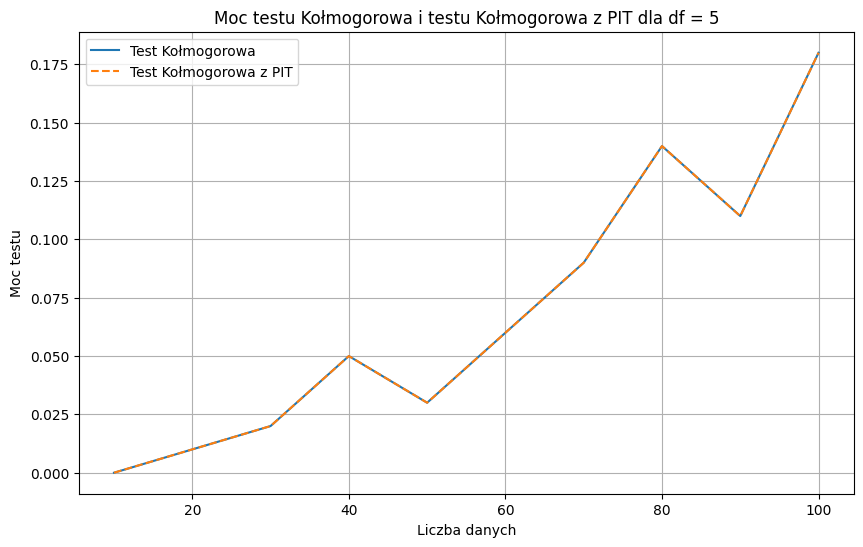

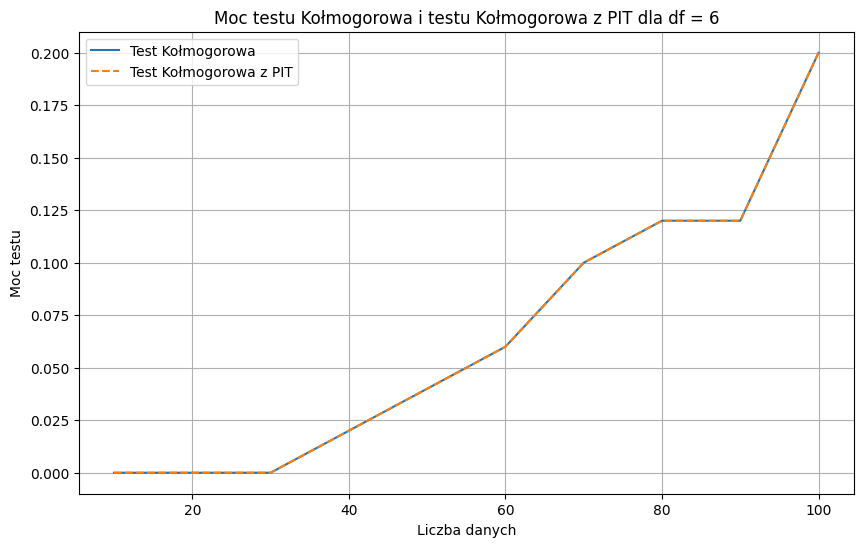

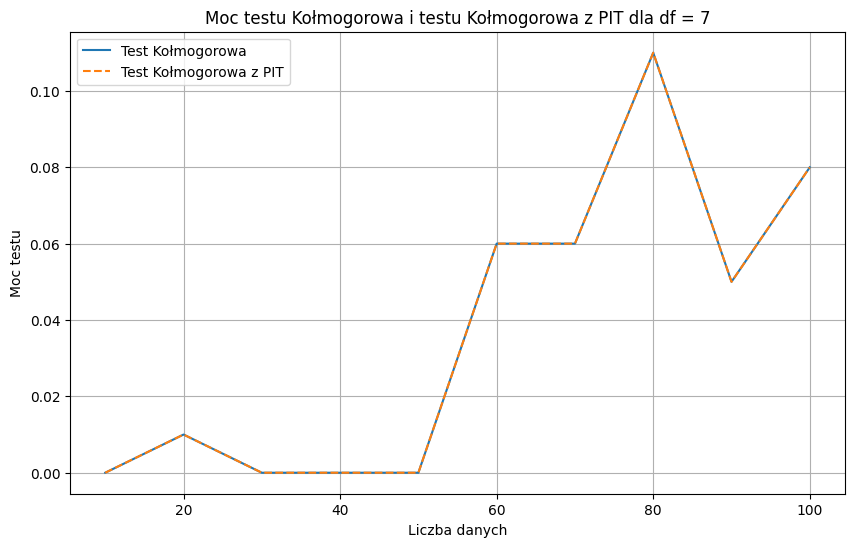

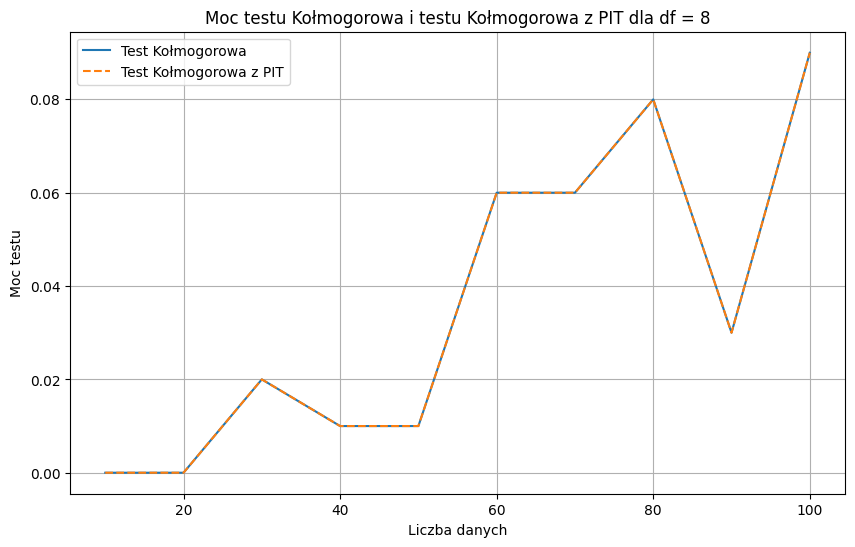

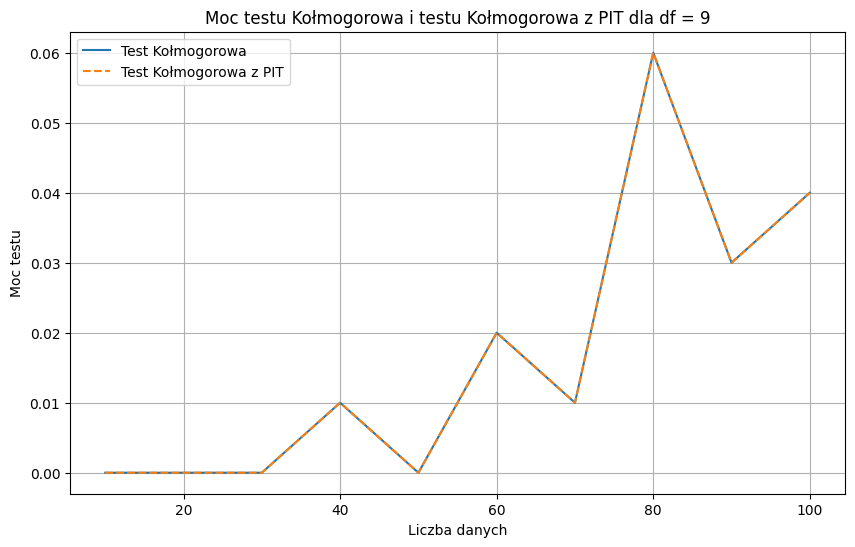

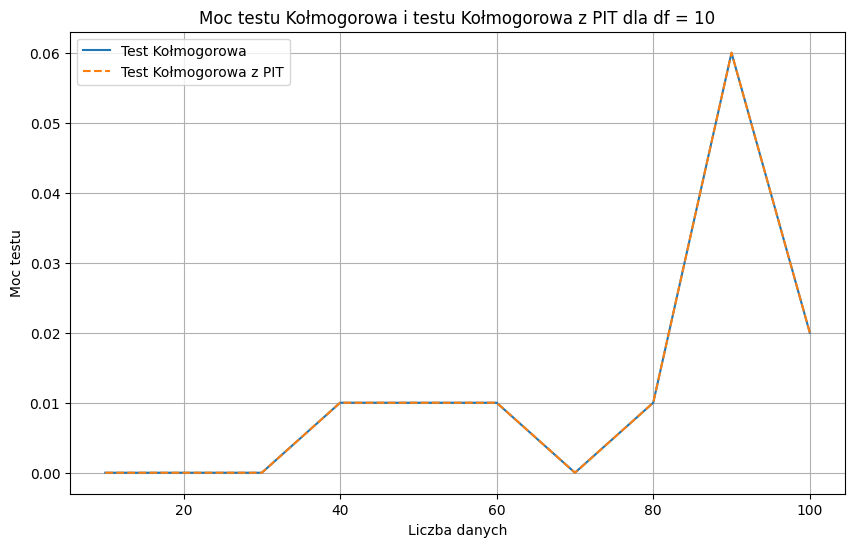

In [13]:
import matplotlib.pyplot as plt

# Wyodrębnienie unikalnych wartości stopni swobody
df_values_unique = list(set(df_values))

for df_val in df_values_unique:
    # Wyodrębnienie wyników dla danej wartości stopni swobody
    sample_sizes_df = [sample_sizes[i] for i in range(len(sample_sizes)) if df_values[i] == df_val]
    ks_test_powers_df = [ks_test_powers[i] for i in range(len(ks_test_powers)) if df_values[i] == df_val]
    pit_ks_test_powers_df = [pit_ks_test_powers[i] for i in range(len(pit_ks_test_powers)) if df_values[i] == df_val]

    # Sortowanie wyników względem wielkości próbki
    sorted_indices = np.argsort(sample_sizes_df)
    sample_sizes_df = np.array(sample_sizes_df)[sorted_indices]
    ks_test_powers_df = np.array(ks_test_powers_df)[sorted_indices]
    pit_ks_test_powers_df = np.array(pit_ks_test_powers_df)[sorted_indices]

   
    plt.figure(figsize=(10, 6))

    plt.plot(sample_sizes_df, ks_test_powers_df, label='Test Kołmogorowa')
    plt.plot(sample_sizes_df, pit_ks_test_powers_df, label='Test Kołmogorowa z PIT', linestyle='--')

    plt.legend()
    plt.xlabel('Liczba danych')
    plt.ylabel('Moc testu')
    plt.title(f'Moc testu Kołmogorowa i testu Kołmogorowa z PIT dla df = {df_val}')
    plt.grid(True)
    plt.show()


Wnioski i interpretacja: 

Wykres przedstawia moc testu Kołmogorowa (K-S Test) oraz testu Kołmogorowa z wykorzystaniem PIT (PIT K-S Test) dla rozkładu t-Studenta z 1 stopniem swobody. Oś X (pozioma) reprezentuje liczbę danych, a oś Y (pionowa) reprezentuje moc testu.

Obie krzywe zaczynają się od niższej mocy, gdy liczba danych jest mała, i rosną wraz ze wzrostem liczby danych. Wskazuje to, że większe próbki mogą prowadzić do większej mocy testu, co jest zgodne z oczekiwaniami - większa próbka daje więcej informacji, co zwiększa moc testu.

Zauważalne jest, że dla danego rozmiaru próbki, moc testu jest generalnie taka sama dla testu PIT K-S w porównaniu do klasycznego testu K-S.

Wraz ze zwiększeniem się stopni swobody moc testu rośnie wolniej i jest mniej stabilna i płynna. 

Podsumowując, wyniki te pokazują, jak moc testów Kołmogorowa zależy od liczby danych i stopni swobody generowanego rozkładu t-Studenta. Jednakże, zwiększenie liczby danych może znacznie zwiększyć moc testu, co jest ważnym wnioskiem do uwzględnienia podczas planowania i interpretacji testów statystycznych. 
